1. CSV Loading
x_data shape: (10127, 19)
y_data shape: (10127, 2)
Feature names: ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

2. Data Analysis


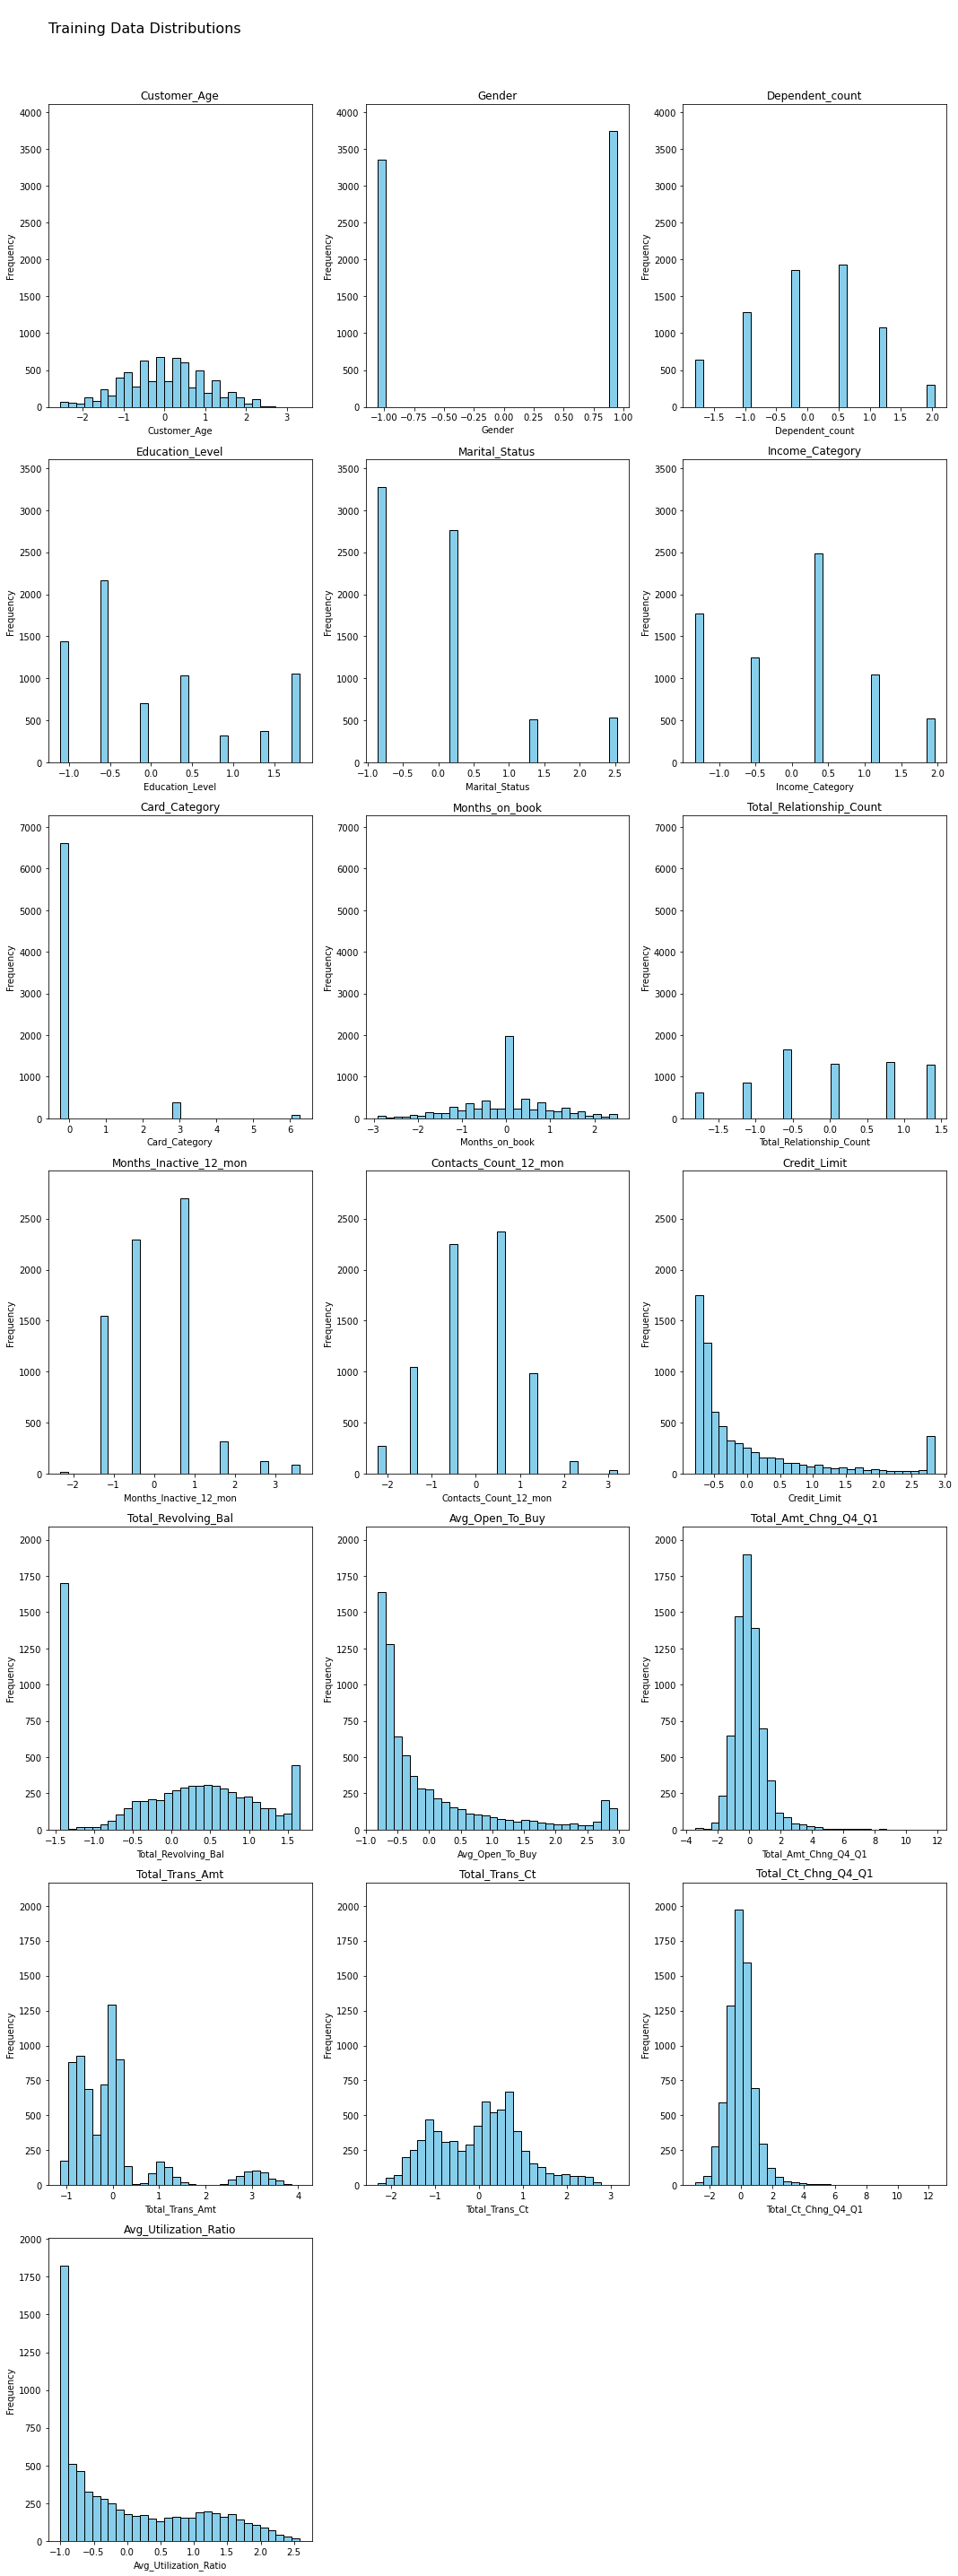

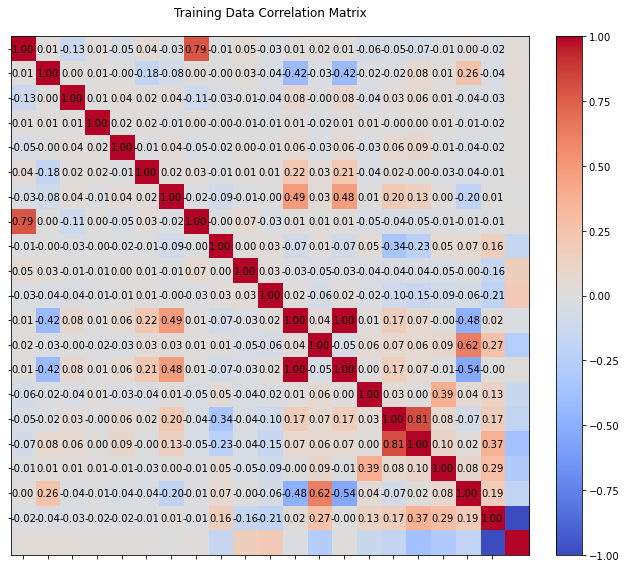

3. Training Models
Total configurations: 243
Training model 1/243 with parameters:
Config indices: (0, 0, 0, 0, 0)
{'hidden_sizes': [32, 16, 8], 'optimizer': <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'>, 'learning_rate': 0.01, 'batch_size': 16, 'epoch': 100}
Epoch 1, Training Loss: 0.4457, Training Accuracy: 0.8393, Validation Loss: 0.4461, Validation Accuracy: 0.8391, Test Loss: 0.4456, Test Accuracy: 0.8396
Epoch 11, Training Loss: 0.2425, Training Accuracy: 0.9066, Validation Loss: 0.2563, Validation Accuracy: 0.9003, Test Loss: 0.2738, Test Accuracy: 0.8894
Epoch 21, Training Loss: 0.1562, Training Accuracy: 0.9378, Validation Loss: 0.1814, Validation Accuracy: 0.9250, Test Loss: 0.1900, Test Accuracy: 0.9205
Epoch 31, Training Loss: 0.1328, Training Accuracy: 0.9457, Validation Loss: 0.1746, Validation Accuracy: 0.9368, Test Loss: 0.1760, Test Accuracy: 0.9304
Epoch 41, Training Loss: 0.1245, Training Accuracy: 0.9499, Validation Loss: 0.1716, Val

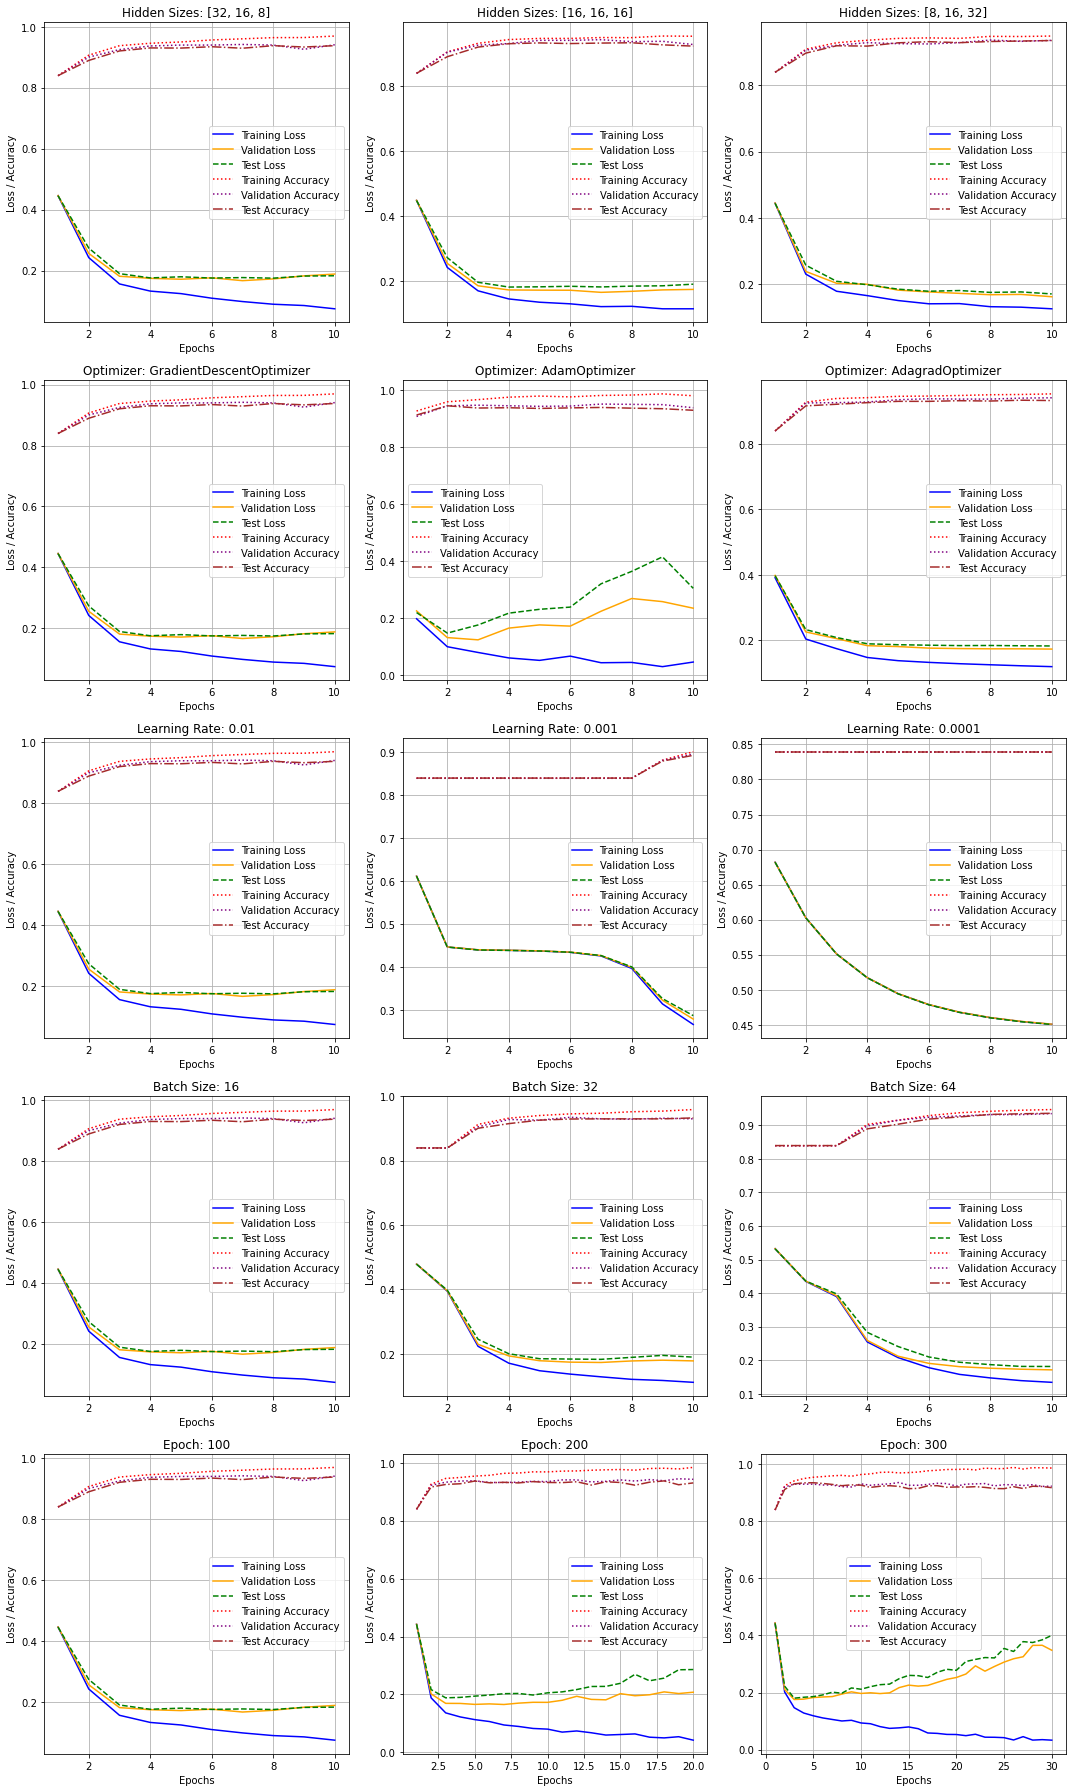

4. Conclusion
[Best Parameters]
Optimizer: GradientDescentOptimizer
Learning rate: 0.01
Hidden sizes: [8, 16, 32]
Batch size: 16
Epoch: 300
Training loss: 0.0886
Validation loss: 0.1323
Test loss: 0.1309
Test Accuracy: 0.9492


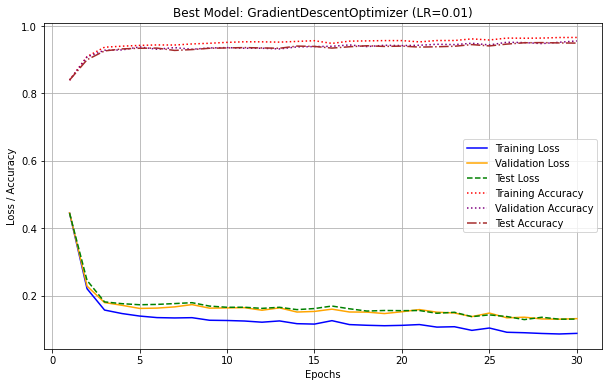


Sample of Actual Values vs Predicted Values:
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0


In [ ]:
import numpy as np
import tensorflow as tf
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

########################
# Data

def load_csv(file_path):

    # 첫 번째 행(헤더) 읽기
    with open(file_path, 'r') as f:
        header = f.readline().strip().split(',')

    # 범주형 컬럼 인덱스 및 고유 값 정의
    categorical_indices = {
        3: ['M', 'F'],  # Gender
        5: ['High School', 'Graduate', 'College', 'Uneducated', 'Doctorate', 'Post-Graduate', 'Unknown'],  # Education_Level
        6: ['Married', 'Single', 'Divorced', 'Unknown'],  # Marital_Status
        7: ['$60K - $80K', '$40K - $60K', 'Less than $40K', '$80K - $120K', '$120K +'],  # Income_Category
        8: ['Blue', 'Silver', 'Gold']  # Card_Category
    }

    # 범주형 변수에 대한 매핑 딕셔너리 생성
    categorical_mappings = {}
    for idx, categories in categorical_indices.items():
        categorical_mappings[idx] = {category: i for i, category in enumerate(categories)}
    
    # 데이터 로드 및 인코딩
    x_data = []
    y_data = []
    with open(file_path, 'r') as f:
        f.readline()  # 헤더 건너뛰기
        for line in f:
            parts = line.strip().split(',')
            # 목표 변수 인코딩 (Attrition_Flag)
            target_str = parts[1]
            if target_str == 'Existing Customer':
                target = 0
            elif target_str == 'Attrited Customer':
                target = 1
            y_data.append(target)
            
            # 특성 인코딩
            features = []
            for i in range(2, 21):  # CLIENTNUM 제외, Attrition_Flag는 인덱스 1
                value = parts[i]
                if i in categorical_mappings:
                    # 범주형 변수 인코딩
                    encoded = categorical_mappings[i].get(value, 0)  # 알 수 없는 값은 0으로 기본 설정
                    features.append(encoded)
                else:
                    # 수치형 변수 변환
                    try:
                        num = float(value)
                    except ValueError:
                        # 변환 불가한 값은 0.0으로 설정
                        num = 0.0   
                    features.append(num)
            x_data.append(features)
    
    # numpy 배열로 변환
    x_data = np.array(x_data, dtype=np.float32)
    y_data = np.array(y_data, dtype=np.int32)
    

    y_data_one_hot = tf.one_hot(y_data, depth=2).eval(session=tf.Session())
    
    # 특성 이름 (Attrition_Flag 제외)
    feature_names = header[2:21]
    
    print(f'1. CSV Loading')  # 대제목 출력
    print(f"x_data shape: {x_data.shape}")
    print(f"y_data shape: {y_data_one_hot.shape}")
    print(f"Feature names: {feature_names}")
    print()
    
    return x_data, y_data_one_hot, feature_names


def split_data(x_data, y_data):
    # 데이터셋을 학습, 검증, 테스트로 나누기
    # random_state는 Seed값으로 동일한 분할 결과를 얻기 위해 사용
    # 전체 데이터의 20%를 테스트 데이터로 사용
    x_temp, x_test, y_temp, y_test = train_test_split(
        x_data, y_data, test_size=0.2, random_state=42, stratify=y_data.argmax(axis=1))
    # 테스트 데이터를 제외한 나머지 데이터의 12.5%를 검증 데이터로 사용, 
    # 나머지를 학습 데이터로 사용
    x_train, x_val, y_train, y_val = train_test_split(
        x_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp.argmax(axis=1))
    
    # 표준화 (스케일링)
    sc = StandardScaler()
    # 학습 데이터에 fit_transform을 사용하여 평균과 표준편차를 계산하고 데이터를 표준화
    x_train = sc.fit_transform(x_train)
    # 검증 및 테스트 데이터에는 학습 데이터의 평균과 표준편차를 사용하여 동일하게 표준화
    x_val = sc.transform(x_val)
    x_test = sc.transform(x_test)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

########################
# Data Analysis

def draw_data_distributions(data, feature_names, title, num_print_columns=3):
    print(f'2. Data Analysis')  # 대제목 출력
    num_columns = data.shape[1]
    num_rows = (num_columns + num_print_columns - 1) // num_print_columns

    fig, axes = plt.subplots(num_rows + 1, num_print_columns, figsize=(15, 5 * (num_rows + 1)), 
                                gridspec_kw={'height_ratios': [0.3] + [2] * num_rows})

    # 소제목을 첫 번째 행에 왼쪽 정렬로 추가
    axes[0, 0].text(0, 0.5, f'{title}', fontsize=16, ha='left', va='center')
    for j in range(num_print_columns):
        axes[0, j].axis('off')

    # 각 행별로 최대 y값을 계산하여 동일한 y축 범위 설정
    for row in range(0, num_rows):
        # 해당 행의 모든 그래프에 대한 최대 y값 찾기
        max_y = 0
        for col in range(num_print_columns):
            i = row * num_print_columns + col
            if i < num_columns:
                counts, _ = np.histogram(data[:, i], bins=30)
                current_max = counts.max()
                if current_max > max_y:
                    max_y = current_max
        
        # 각 그래프에 히스토그램 그리기 및 y축 범위 설정
        for col in range(num_print_columns):
            i = row * num_print_columns + col
            if i < num_columns:
                axe = axes[row+1, col]
                axe.hist(data[:, i], bins=30, color='skyblue', edgecolor='black')
                axe.set_title(f'{feature_names[i]}')
                axe.set_xlabel(f'{feature_names[i]}')
                axe.set_ylabel('Frequency')
                axe.set_ylim(0, max_y + max_y * 0.1)  # 최대 y값의 110%로 설정

    # 남은 빈 플롯 비활성화
    for i in range(num_columns, num_rows * num_print_columns):
        row = (i // num_print_columns) + 1
        col = i % num_print_columns
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

def draw_correlation_matrix(x, y, feature_names, title=None):
    # 입력 특성과 목표 변수를 결합
    data = np.hstack((x, y))
    
    # 상관계수 행렬 계산
    corr_matrix = np.corrcoef(data, rowvar=False)
    # 특성 수
    num_features = x.shape[1]

    feature_labels = feature_names + ['Target']
    
    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    
    # 축 레이블 설정 (제거)
    plt.xticks(range(num_features + 1), [])  # 열 이름 제거
    plt.yticks(range(num_features + 1), [])  # 행 이름 제거
    
    # 각 셀에 상관계수 표시
    for i in range(num_features + 1):
        for j in range(num_features + 1):
            text = f"{corr_matrix[i, j]:.2f}"
            plt.text(j, i, text,
                     ha="center", va="center", color="black")
    
    # 제목 설정
    if title:
        plt.title(title, pad=20)
    
    plt.tight_layout()
    plt.show()

########################
# Learning

def create_graph(optimizer, input_num, hidden_sizes, output_num):
    tf.reset_default_graph()  # 그래프 초기화
    
    x = tf.placeholder(tf.float32, [None, input_num], name='x')  # 입력 데이터 플레이스홀더
    y = tf.placeholder(tf.float32, [None, output_num], name='y')  # 레이블 데이터 플레이스홀더

    # 은닉층 생성
    layer_input = x
    layer_input_size = input_num

    for idx, hidden_size in enumerate(hidden_sizes):
        W_hidden = tf.Variable(tf.random_normal([layer_input_size, hidden_size], stddev=0.1),
                               name=f'W_hidden_{idx+1}')
        b_hidden = tf.Variable(tf.zeros([hidden_size]), name=f'b_hidden_{idx+1}')
        layer_output = tf.nn.relu(tf.matmul(layer_input, W_hidden) + b_hidden, name=f'relu_{idx+1}')

        # 다음 층을 위한 입력 업데이트
        layer_input = layer_output
        layer_input_size = hidden_size

    # 출력층
    W_output = tf.Variable(tf.random_normal([layer_input_size, output_num], stddev=0.1), name='W_output')
    b_output = tf.Variable(tf.zeros([output_num]), name='b_output')
    logits = tf.matmul(layer_input, W_output) + b_output

    prediction = tf.nn.softmax(logits, name='prediction')
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits), name='loss')
    train_step = optimizer.minimize(loss, name='train_step')

    # 정확도 계산
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

    return x, y, prediction, loss, train_step, accuracy

def execute_graph(x, y, prediction, loss, train_step, accuracy, data, epoch, batch_size):
    train_losses = []
    val_losses = []
    test_losses = []
    
    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    x_train, x_val, x_test, y_train, y_val, y_test = data
       
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())  # 변수 초기화
        for e in range(1, epoch + 1):
            # 학습 데이터 셔플
            permutation = np.random.permutation(len(x_train))
            x_train_shuffled = x_train[permutation]
            y_train_shuffled = y_train[permutation]

            num_batches = (len(x_train) + batch_size - 1) // batch_size
            for i in range(num_batches):
                start_idx = i * batch_size
                end_idx = min((i+1) * batch_size, len(x_train))
                batch_x = x_train_shuffled[start_idx:end_idx]
                batch_y = y_train_shuffled[start_idx:end_idx]
                sess.run(train_step, feed_dict={x: batch_x, y: batch_y})

            if e % 10 == 1:
                # 손실과 정확도 계산
                train_loss, train_acc = sess.run([loss, accuracy], feed_dict={x: x_train, y: y_train})
                val_loss, val_acc = sess.run([loss, accuracy], feed_dict={x: x_val, y: y_val})
                test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: x_test, y: y_test})
                
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                test_losses.append(test_loss)

                train_accuracies.append(train_acc)
                val_accuracies.append(val_acc)
                test_accuracies.append(test_acc)
                print(f'Epoch {e}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}, '
                      f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}, '
                      f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

        # 최종 예측 저장
        predictions = sess.run(prediction, feed_dict={x: x_test})

    return train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies, predictions

def draw_loss_and_accuracy(axe, train_losses, val_losses, test_losses, 
                           train_accuracies, val_accuracies, test_accuracies, title=None, y_lim=None):
    if len(train_losses) > 0:
        epochs = range(1, len(train_losses) + 1)
        axe.plot(epochs, train_losses, label='Training Loss', color='blue')
        axe.plot(epochs, val_losses, label='Validation Loss', color='orange')
        axe.plot(epochs, test_losses, label='Test Loss', color='green', linestyle='--')
        axe.plot(epochs, train_accuracies, label='Training Accuracy', color='red', linestyle=':')
        axe.plot(epochs, val_accuracies, label='Validation Accuracy', color='purple', linestyle=':')
        axe.plot(epochs, test_accuracies, label='Test Accuracy', color='brown', linestyle='-.')
        axe.set_xlabel('Epochs')
        axe.set_ylabel('Loss / Accuracy')
        if title is not None:
            axe.set_title(f'{title}')
        axe.legend()
        axe.grid(True)
        if y_lim:
            axe.set_ylim(y_lim)

def format_param(param_name, param_value):
    if param_name == 'optimizer':
        return f"{param_name.replace('_', ' ').title()}: {param_value.__name__}"
    elif param_name == 'hidden_sizes':
        return f"{param_name.replace('_', ' ').title()}: {param_value}"
    else:
        return f"{param_name.replace('_', ' ').title()}: {param_value}"

def learn(data, param_grid):
    x_train, x_val, x_test, y_train, y_val, y_test = data
    best_report = None
    best_test_accuracy = -1

    # 모든 가능한 하이퍼파라미터 조합 생성
    param_keys = list(param_grid.keys())
    param_values = [param_grid[key] for key in param_keys]
    all_configurations = list(itertools.product(*param_values))
    print('3. Training Models')
    print(f"Total configurations: {len(all_configurations)}")

    # 하이퍼파라미터 중 가장 많은 옵션을 가진 것을 기준으로 컬럼 수 결정
    num_columns = max(len(options) for options in param_grid.values())
    num_rows = len(param_keys)

    # 시각화를 위한 구성 인덱스 수집
    plot_config_indices = {}
    for param_idx, key in enumerate(param_keys):
        options_length = len(param_grid[key])
        configs = []
        for idx in range(options_length):
            config_indices = [0] * len(param_keys)
            config_indices[param_idx] = idx
            configs.append(tuple(config_indices))
        plot_config_indices[param_idx] = configs

    # 모든 구성의 결과 저장
    results = {}
    for idx, config_values in enumerate(all_configurations):
        params = dict(zip(param_keys, config_values))
        config_indices = tuple(param_grid[key].index(value) for key, value in params.items())
        print(f"Training model {idx+1}/{len(all_configurations)} with parameters:")
        print(f"Config indices: {config_indices}")
        print(params)

        optimizer_class = params['optimizer']
        learning_rate = params['learning_rate']
        hidden_sizes = params['hidden_sizes']
        epoch = params['epoch']
        batch_size = params['batch_size']

        optimizer = optimizer_class(learning_rate=learning_rate)
        
        # 그래프 생성
        x, y, prediction, loss, train_step, accuracy = create_graph(
            optimizer, x_train.shape[1], hidden_sizes, y_train.shape[1])
        
        # 그래프 실행
        train_losses, val_losses, test_losses, train_accuracies, val_accuracies, \
        test_accuracies, predictions = execute_graph(
            x, y, prediction, loss, train_step, accuracy,
            (x_train, x_val, x_test, y_train, y_val, y_test), epoch, batch_size)

        # 최고 성능 모델 업데이트
        if test_accuracies[-1] > best_test_accuracy:
            best_test_accuracy = test_accuracies[-1]
            best_report = {
                "params": params,
                "train_losses": train_losses,
                "val_losses": val_losses,
                "test_losses": test_losses,
                "train_accuracies": train_accuracies,
                "val_accuracies": val_accuracies,
                "test_accuracies": test_accuracies,
                "predictions": predictions,
                "y_test": y_test
            }
            print(f"New best model found: Test Accuracy = {best_test_accuracy:.4f}\n")

        # 모든 구성의 결과 저장
        results[config_indices] = {
            "params": params,
            "train_losses": train_losses,
            "val_losses": val_losses,
            "test_losses": test_losses,
            "train_accuracies": train_accuracies,
            "val_accuracies": val_accuracies,
            "test_accuracies": test_accuracies,
        }

        print("-" * 80)

    # 지정된 구성을 시각화
    # 서브플롯 준비
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 5 * num_rows))
    plt.subplots_adjust(hspace=0.5)

    # 서브플롯이 2D 배열이 되도록 조정 (단일 행 또는 열인 경우)
    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)
    if num_columns == 1:
        axes = np.expand_dims(axes, axis=1)

    for param_idx, configs in plot_config_indices.items():
        for col_index, config_indices in enumerate(configs):
            row_index = param_idx
            ax = axes[row_index, col_index]

            result = results.get(config_indices)
            if result:
                param_name = param_keys[param_idx]
                param_value = param_grid[param_name][config_indices[param_idx]]
                formatted_title = format_param(param_name, param_value)
                draw_loss_and_accuracy(
                    ax,
                    result['train_losses'],
                    result['val_losses'],
                    result['test_losses'],
                    result['train_accuracies'],
                    result['val_accuracies'],
                    result['test_accuracies'],
                    title=formatted_title
                )
            else:
                ax.axis('off')

    plt.tight_layout()
    plt.show()
    return best_report

########################
# Report

def generate_report(report):
    print('4. Conclusion')

    if report is None:
        print("No report to generate.")
        return
    
    params = report['params']
    print(f"[Best Parameters]")
    print(f"Optimizer: {params['optimizer'].__name__}")
    print(f"Learning rate: {params['learning_rate']}")
    print(f"Hidden sizes: {params['hidden_sizes']}")
    print(f"Batch size: {params['batch_size']}")
    print(f"Epoch: {params['epoch']}")
    print(f"Training loss: {report['train_losses'][-1]:.4f}")
    print(f"Validation loss: {report['val_losses'][-1]:.4f}")
    print(f"Test loss: {report['test_losses'][-1]:.4f}")
    print(f"Test Accuracy: {report['test_accuracies'][-1]:.4f}")

    # 손실 및 정확도 그래프
    fig, ax = plt.subplots(figsize=(10, 6))
    draw_loss_and_accuracy(ax, report['train_losses'], report['val_losses'], report['test_losses'],
                           report['train_accuracies'], report['val_accuracies'], report['test_accuracies'],
                           title=f"Best Model: {params['optimizer'].__name__} (LR={params['learning_rate']})")
    plt.show()

    # 실제 값과 예측 값 출력
    print("\nSample of Actual Values vs Predicted Values:")
    test_classes = report['y_test'].argmax(axis=1)
    predicted_classes = report['predictions'].argmax(axis=1)
    for test, predicted in zip(test_classes[:10], predicted_classes[:10]):
        print(f"Actual: {test}, Predicted: {predicted}")

########################
# 파라미터 그리드 설정

# 하이퍼파라미터 그리드 설정
# 각 하이퍼파라미터마다 2개의 옵션으로 설정
param_grid = {    
    'hidden_sizes': [[32, 16, 8], [16, 16, 16], [8, 16, 32]],
    #tf.train.RMSPropOptimizer, tf.train.MomentumOptimizer, tf.train.FtrlOptimizer, tf.train.ProximalAdagradOptimizer, tf.train.ProximalGradientDescentOptimizer, tf.train.AdadeltaOptimizer
    'optimizer': [tf.train.GradientDescentOptimizer, tf.train.AdamOptimizer, tf.train.AdagradOptimizer],
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [16, 32, 64],
    'epoch': [100, 200, 300]
}

########################
# 메인 실행 흐름

def main():
    # Data
    x_data, y_data, feature_names = load_csv('BankChurners.csv')
    x_train, x_val, x_test, y_train, y_val, y_test = split_data(x_data, y_data)
    data = (x_train, x_val, x_test, y_train, y_val, y_test)

    # Data Analys
    draw_data_distributions(x_train, feature_names, 'Training Data Distributions')
    draw_correlation_matrix(x_train, y_train, feature_names, title='Training Data Correlation Matrix')

    # Learning
    best_report = learn(data, param_grid)

    # Report
    generate_report(best_report)

if __name__ == "__main__":
    main()
